# Parts of Speech 

Most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in different order can mean something completely different. There are a lot of nuance of how words are placed and that is why we need to look at part of speech that word is being used in, not just a word itself.

Even splitting text into useful weord-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it is usually better to use linguistic knowledge to add useful information, to know if you mean a noun versus a verb versus an adjective.

That's exactly what `spaCy` is designed to do: you put a raw text and get back a **Doc** object that comes with a variety of annotations.

In this notebook I will take a closer look at coarse POS tags, basic parts of speech (noun, verb, adjective) and fine-grained tags, more nuance information (plural noun, past-tense verb, superlative adjective).

English is an incredibly complex language with many rules (and even more exceptions to rules).

In [1]:
import spacy

In [11]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [12]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

Let's print out string text.

In [13]:
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


Be can obtain particulary tokens by index position.

In [14]:
print(doc[4])

jumped


We can call various parts of this token. It is a verb, past tense. Without `_` it will give an id of this `tag` or `pos`

In [15]:
print(doc[4].pos_)

VERB


In [16]:
print(doc[4].tag_)

VBD


In [19]:
for token in doc:
    print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

The        DET        DT         determiner
quick      ADJ        JJ         adjective
brown      ADJ        JJ         adjective
fox        NOUN       NN         noun, singular or mass
jumped     VERB       VBD        verb, past tense
over       ADP        IN         conjunction, subordinating or preposition
the        DET        DT         determiner
lazy       ADJ        JJ         adjective
dog        NOUN       NN         noun, singular or mass
's         PART       POS        possessive ending
back       NOUN       NN         noun, singular or mass
.          PUNCT      .          punctuation mark, sentence closer


Let's create another document. And examine the 2nd word.

In [20]:
doc = nlp(u"I read books on NLP.")

In [21]:
word = doc[1]

In [22]:
word.text

'read'

In [23]:
token = word
print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

read       VERB       VBP        verb, non-3rd person singular present


In [24]:
doc = nlp(u"I read a book on NLP.")

In [25]:
word = doc[1]

token = word

print(f"{token.text:{10}} {token.pos_:{10}} {token.tag_:{10}} {spacy.explain(token.tag_)}")

read       VERB       VBD        verb, past tense


We see that the tag is different. For the 1st case it was `non-3rd person singular present`, for the 2nd one it is a `verb, past tense`. `SpaCy` is capable of understanding the context of the word even if word looks the same, taking into accont it's position and it's role in the sentence.

`SpaCy` also allows to get Part of Speech count.

In [26]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

The cell below is going to return a dictionary.

In [28]:
POS_counts = doc.count_by(spacy.attrs.POS)

This is a part of speech code, which appears if `_` is get removed from the `pos`. Meaning `pos` istead of `pos_`

In [29]:
POS_counts

{96: 1, 83: 3, 99: 1, 84: 1, 89: 2, 91: 3, 93: 1}

We can return them if we refer to `vocab`.

In [31]:
doc.vocab[83].text

'ADJ'

In [32]:
doc[2].pos, doc[2].pos_

(83, 'ADJ')

We can create frequency of part of speech for the whole document as following:

In [34]:
for k, v in sorted(POS_counts.items()):
    print(f"{k:{5}}. {doc.vocab[k].text:{5}} {v}")

   83. ADJ   3
   84. ADP   1
   89. DET   2
   91. NOUN  3
   93. PART  1
   96. PUNCT 1
   99. VERB  1


The following output looks a little bit bizzare since some certain text values are hardcoded into document vocab `doc.vocab`. Nouns and punctuations are appearing most frequently that is why they have smaller numbers. This is done in favour of efficiency.

In [37]:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k, v in sorted(TAG_counts.items()):
    print(f"{k:{10}}. {doc.vocab[k].text:{10}} {v}")

        74. POS        1
1292078113972184607. IN         1
10554686591937588953. JJ         3
12646065887601541794. .          1
15267657372422890137. DT         2
15308085513773655218. NN         3
17109001835818727656. VBD        1


In [38]:
len(doc.vocab)

57863

We can do the same thing for syntatic dependency. Here the same things happens as the less common ones have the largest numbers.

In [39]:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k, v in sorted(DEP_counts.items()):
    print(f"{k:{10}}. {doc.vocab[k].text:{10}} {v}")

       399. amod       3
       412. det        2
       426. nsubj      1
       436. pobj       1
       437. poss       1
       440. prep       1
       442. punct      1
8110129090154140942. case       1
8206900633647566924. ROOT       1


___
# Visualizing Part of Speech

Let's review how to visualize Parts of Speech structure with `displacy`.

In [40]:
import spacy

In [42]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [43]:
doc = nlp(u"The quick brown fox jumped over the lazy dog.")

In [44]:
from spacy import displacy

In [45]:
displacy.render(doc, style='dep', jupyter=True)

There are options that you can actually use as modifiers for this rendering.

In [46]:
options = {'distance': 110, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}

In [47]:
displacy.render(doc, style='dep', jupyter=True, options=options)

If larger amount of test are used `displacy.serve` is meant to accept a single document or a list of documents. Large amount of text is hard to visualise, it is more common to pass a list of spans instead.

In [48]:
doc2 = nlp(u'This a sentence. This is another sentece. This is another sentence, possibly longer than the other')

In [50]:
spans = list(doc2.sents)

In [52]:
displacy.serve(spans, style='dep', options={'distance': 110})


    Serving on port 5000...
    Using the 'dep' visualizer



127.0.0.1 - - [18/Feb/2024 20:37:43] "GET / HTTP/1.1" 200 11591
127.0.0.1 - - [18/Feb/2024 20:37:44] "GET /favicon.ico HTTP/1.1" 200 11591



    Shutting down server on port 5000.



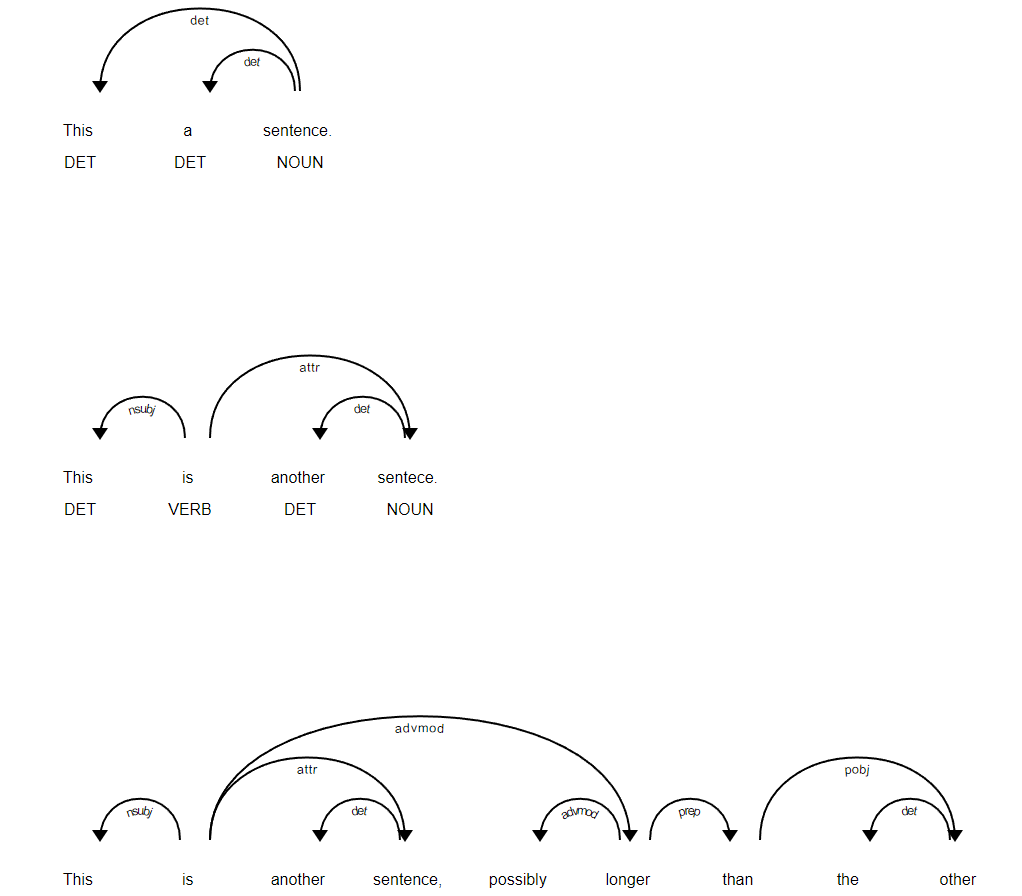

___
# Named Entity Recognition

Named-entity recognition (NER) seeks to locate and classify named entity mentions in unstructured text into pre-defined categories such as the person names, organizations, locations, medical codes, time expressions, quantitioes, monetary values, percentages, etc.

For example my goal is to read a raw text such as:
- Jim bought 300 shares of Acme Corp. in 2006

And add additional NER information:
- [Jim] (Person) bought 300 shares of [Acme Corp] (Organization) in [2006] (Time).

In [55]:
import spacy

In [56]:
import en_core_web_sm

nlp = en_core_web_sm.load()

Let's write a function to display basic entity information.

In [4]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    else:
        print('No entites found.')

In [58]:
doc = nlp(u'Hi how are you?')

In [59]:
show_ents(doc)

No entites found.


Now let's add a document which have entities.

In [60]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

In [61]:
show_ents(doc)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


In [62]:
doc = nlp(u'Can I please have 500 dollars of Microsoft stock?')

`spaCy` is smart enough to see that "500" and "dollars" are coming together as well as indentifying Microsoft as organization.

In [63]:
show_ents(doc)

500 dollars - MONEY - Monetary values, including unit
Microsoft - ORG - Companies, agencies, institutions, etc.


Let's imagine that we want to add a named-entity to a span. Now, normally we would have `spaCy` build in library of named entites by training oit on several samples of text but in this case we just want to add one value.

In [66]:
doc = nlp(u'Red Apple to build a U.K. factory for $6 million')

In [67]:
show_ents(doc)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


We see that "Red Apple" is not recognized as an organization. We want to tell `spaCy` that "Red Apple" is an `ORG`. This is very useful for custom datasets.

In [68]:
from spacy.tokens import Span

Getting a label for the `ORG`.

In [70]:
ORG = doc.vocab.strings[u"ORG"]

In [71]:
ORG

381

Grabbing first 2 words. Positions are given from 0 to 2, 2 is meant exclusive and label is a label assinged to the entity

In [72]:
new_ent = Span(doc,0,2, label=ORG)

Technically we can use append here.

In [74]:
doc.ents = list(doc.ents) + [new_ent]

Now we see that its been assigned as an `ORG`.

In [75]:
show_ents(doc)

Red Apple - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


## Adding Named Entities to all Matchin Spans

What if we want to tag all occurances of "Red Apple"? In the following code I will go over how to add multiple phrases as NERs. For example, if we are working with a vacuum company, we might want to add both **vacuum cleaner** and **vacuum-cleaner** as `PROD`(product) NERs.

In [1]:
import spacy

In [2]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [3]:
doc = nlp(u"Our company created a brand new vacuum cleaner."
         u"This new vacuum-cleaner is the best in show")

As you may see neither "vacuum cleaner" nor "vacuum-cleaner" are recognized as NERs.

In [5]:
show_ents(doc)

No entites found.


Let's add "vaccum cleaner" as named entity.

In [6]:
from spacy.matcher import PhraseMatcher

In [7]:
matcher = PhraseMatcher(nlp.vocab)

So this is our phrase list and now we need to turn these into phrase patterns by passing them into the NLP function.

In [8]:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']

In [9]:
phrase_patterns = [nlp(text) for text in phrase_list]

In [12]:
matcher.add('newproduct', None, *phrase_patterns)

In [18]:
found_matches = matcher(doc)

So here are matches for both of cases:

In [19]:
found_matches

[(2689272359382549672, 6, 8), (2689272359382549672, 11, 14)]

From here we can create spans for each match and create named entities from them.

In [20]:
from spacy.tokens import Span

In [21]:
PROD = doc.vocab.strings[u"PRODUCT"]

Then we will use `Span` to define start of the span and end of the span for the `found_matches`.

In [22]:
new_ents = [Span(doc, match[1], match[2], label=PROD) for match in found_matches]

In [23]:
doc.ents = list(doc.ents) + new_ents

In [24]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum-cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)


`SpaCy` have count method for Parts of Speech but it doesn't have it for NERs. Let's create one so we could also filter based of the label.

Let's figure out how many times money is mentioned in the following string.

In [25]:
doc = nlp(u"Originally I payed $29.95 for this car toy, but now it is marked down by 10 dollars")

In [26]:
[ent for ent in doc.ents if ent.label_ == "MONEY"]

[29.95, 10 dollars]

In [27]:
len([ent for ent in doc.ents if ent.label_ == "MONEY"])

2

___
# Visualizing Named Entity Recognition

In [31]:
import spacy
from spacy import displacy

In [32]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [38]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.")

In [39]:
displacy.render(doc, style='ent', jupyter=True)

Let's imagine we have a situation when we have multiple lines and we want to visualize them line by line.

In [40]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million."
         u"By contrast, Sony only sold 8 thousand Walkman music players.")

Let's try to visualize `doc` as it is right now using the same approach.

In [41]:
displacy.render(doc, style='ent', jupyter=True)

Now let's visualize it line by line.

In [42]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True)

We can also use `options` for things like coloring or customized effects. It is possible to only display or highlight certain entities.

In [45]:
options = {'ents': ['PRODUCT', 'ORG']}

In [46]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True, options=options)

We can also choose different colors for different entities.

In [50]:
colors = {"ORG": '#aa9cfc'}
options = {'ents': ['PRODUCT', 'ORG'], 'colors': colors}

In [51]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True, options=options)

It is also possible to add linear gradients or radial gradients.

In [52]:
colors = {"ORG": 'radial-gradient(yellow, green)'}
options = {'ents': ['PRODUCT', 'ORG'], 'colors': colors}

In [53]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True, options=options)

In [56]:
colors = {"ORG": 'linear-gradient(60deg, #aa9fcf, #fc9ce7)'}
options = {'ents': ['PRODUCT', 'ORG'], 'colors': colors}

In [57]:
for sent in doc.sents:
    displacy.render(nlp(sent.text), style='ent', jupyter=True, options=options)

In [58]:
displacy.serve(doc, style='ent', options=options)


    Serving on port 5000...
    Using the 'ent' visualizer



127.0.0.1 - - [20/Feb/2024 19:30:56] "GET / HTTP/1.1" 200 2163
127.0.0.1 - - [20/Feb/2024 19:30:56] "GET /favicon.ico HTTP/1.1" 200 2163



    Shutting down server on port 5000.



___
# Sentence Segmentation

In this part of the notebook I will show how sentence segmentation works, and how to set own segmenation rules to break up docs into sentences based on custom rules.

In [59]:
import spacy

In [60]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [72]:
doc = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [73]:
for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


This `doc.sents` is a generator so if you try to index off of sents it will fail:

In [74]:
doc.sents[0]

TypeError: 'generator' object is not subscriptable

Because it generates sentences instead of holding them into the memory. One way around is to create a list out of `sents` and index off them.

In [75]:
list(doc.sents)

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

In [76]:
list(doc.sents)[0]

This is the first sentence.

But it will be `spaCy` `Span` objects and not just strings.

In [77]:
type(list(doc.sents)[0])

spacy.tokens.span.Span

But it is possible to create custom rules to segment sentences. For example we can segment based off a semicolon, which technically not the stop of a sentence.

In [81]:
doc = nlp(u'"Management is doing the right things; leadership doing the right things." -Peter Drucker')

In [82]:
doc.text

'"Management is doing the right things; leadership doing the right things." -Peter Drucker'

In [83]:
for sent in doc.sents:
    print(sent)
    print()

"Management is doing the right things; leadership doing the right things."

-Peter Drucker



It is possible to add a segmentation rule or change rules entirely.

IN the `set_custom_boundaries` we go through entire string but not including the last token. And then if `token` text is equal to `;` we say that very next word (that is why `token.i+1` is a start of a new sentence. The `doc[:-1]` is used in order not to get index out of range.

In [86]:
# Add a segmentation rule

def set_custom_boundaries(doc):
    
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

In [87]:
nlp.add_pipe(set_custom_boundaries, before='parser')

nlp.pipe_names

['tagger', 'set_custom_boundaries', 'parser', 'ner']

In [90]:
doc4 = nlp(u'"Management is doing the right things; leadership doing the right things." -Peter Drucker')

In [91]:
for sent in doc4.sents:
    print(sent)

"Management is doing the right things;
leadership doing the right things."
-Peter Drucker


Now let's change the rules completely.

In [92]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [95]:
mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."

In [97]:
print(mystring)

This is a sentence. This is another.

This is a 
third sentence.


In [98]:
doc = nlp(mystring)

It was able to pickup on duble sets of new lines.

In [99]:
for sent in doc.sents:
    print(sent)

This is a sentence.
This is another.


This is a 
third sentence.


In [100]:
from spacy.pipeline import SentenceSegmenter

In [104]:
def split_on_newlines(doc):
    start = 0
    seen_newline = False
    
    for word in doc:
        if seen_newline:
            yield doc[start:word.i]
            start = word.i
            seen_newline = False
            
        elif word.text.startswith('\n'):
            seen_newline = True
            
    yield doc[start:]

In [106]:
sbd = SentenceSegmenter(nlp.vocab, strategy=split_on_newlines)

In [107]:
nlp.add_pipe(sbd)

In [108]:
doc = nlp(mystring)

Now we are not splitting by default. The rules are completely overwritten.

In [109]:
for sent in doc.sents:
    print(sent)

This is a sentence. This is another.


This is a 

third sentence.
